# About Dataset

- Basic customer information:

MEMBER_NO: Membership card number (ID)  
FFP_DATE: Membership join date  
FIRST_FLIGHT_DATE: First flight date  
GENDER: Gender  
FFP_TIER: Membership card level  
WORK_CITY: The city where the customer works  
WORK_PROVINCE: The province where the customer works  
WORK_COUNTRY: The country where the customer works  
AGE: Age  

- Flight information:

LOAD_TIME: The end time of the observation window (observation window: time period of observation)  
FLIGHT_COUNT: Number of flights in the observation window  
SUM_YR_1 : Fare revenue  
SUM_YR_2 : Votes prices  
SEG_KM_SUM: Total flight kilometers in the observation window  
LAST_FLIGHT_DATE: Last flight date  
LAST_TO_END: The time from the last flight to the end of the observation window  
AVG_INTERVAL: Average flight time interval  
MAX_INTERVAL: Maximum flight interval  
avg_discount: Average discount rate  

- Integral information

BP_SUM: Total basic integral  
EXCHANGE_COUNT: Number of points exchanged  
Points_Sum: Total cumulative points  
Point_NotFlight: points not used by the customer  

# Import Library and Load Data

## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


## Load Data and Describe Data

Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering (20 poin) Langkah-langkah: a. Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat b. Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal) c. Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

In [2]:
df = pd.read_csv('flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
52209,21012,3/12/2008,5/16/2008,Male,4,shenzhen,guangdong,CN,47.0,3/31/2014,...,1348.0,3451,3/18/2014,14,713.000000,713,0,0.702315,2451,0
17988,12237,6/3/2008,6/14/2008,Male,4,beijing,beijing,CN,53.0,3/31/2014,...,4987.0,15601,9/6/2013,208,42.833333,153,1,0.872626,13523,1
60241,37935,2/26/2013,3/14/2013,Male,4,zhongqing,zhongqing,CN,24.0,3/31/2014,...,884.0,4005,3/2/2014,30,88.500000,134,0,0.304000,303,0
6714,26394,11/3/2009,11/10/2009,Female,4,wulumuqi,xinjiang,CN,54.0,3/31/2014,...,12916.0,46418,3/30/2014,2,34.294118,245,2,0.616257,20177,2
56483,5340,1/30/2013,1/30/2013,Male,4,chengdu,sichuan,CN,41.0,3/31/2014,...,1293.0,2926,11/30/2013,123,152.000000,297,0,0.611647,1087,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- dataset memiliki 62988 rows dan 23 columns.
- Terdapat beberapa feature memiliki missing values.
- kita tidak membutuhkan feature MEMBER_NO karena memiliki banyak unique values

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


### Check Missing Values

In [5]:
df.isna().sum()
for i in df.columns:
    print(f'Missing value pada kolom {i} sebanyak {(df[i].isna().sum())}, dengan persentase {round(((df[i].isna().sum())/(len(df))*100),2)}%')

Missing value pada kolom MEMBER_NO sebanyak 0, dengan persentase 0.0%
Missing value pada kolom FFP_DATE sebanyak 0, dengan persentase 0.0%
Missing value pada kolom FIRST_FLIGHT_DATE sebanyak 0, dengan persentase 0.0%
Missing value pada kolom GENDER sebanyak 3, dengan persentase 0.0%
Missing value pada kolom FFP_TIER sebanyak 0, dengan persentase 0.0%
Missing value pada kolom WORK_CITY sebanyak 2269, dengan persentase 3.6%
Missing value pada kolom WORK_PROVINCE sebanyak 3248, dengan persentase 5.16%
Missing value pada kolom WORK_COUNTRY sebanyak 26, dengan persentase 0.04%
Missing value pada kolom AGE sebanyak 420, dengan persentase 0.67%
Missing value pada kolom LOAD_TIME sebanyak 0, dengan persentase 0.0%
Missing value pada kolom FLIGHT_COUNT sebanyak 0, dengan persentase 0.0%
Missing value pada kolom BP_SUM sebanyak 0, dengan persentase 0.0%
Missing value pada kolom SUM_YR_1 sebanyak 551, dengan persentase 0.87%
Missing value pada kolom SUM_YR_2 sebanyak 138, dengan persentase 0.22%


#### Check Double Space

In [6]:
# Loop untuk setiap kolom dalam DataFrame
for column in df.columns:
    # Mengecek jumlah nilai yang hanya terdiri dari spasi ganda di setiap kolom
    spasi_ganda_check = (df[column].astype(str).str.strip() == '').sum()
    
    # Mencetak hasil jika terdapat nilai spasi ganda di suatu kolom
    if spasi_ganda_check > 0:
        print(f"Kolom '{column}' memiliki {spasi_ganda_check} nilai yang hanya spasi ganda.")
    else:
        print(f"Tidak ada nilai yang hanya spasi ganda di kolom '{column}'.")

Tidak ada nilai yang hanya spasi ganda di kolom 'MEMBER_NO'.
Tidak ada nilai yang hanya spasi ganda di kolom 'FFP_DATE'.
Tidak ada nilai yang hanya spasi ganda di kolom 'FIRST_FLIGHT_DATE'.
Tidak ada nilai yang hanya spasi ganda di kolom 'GENDER'.
Tidak ada nilai yang hanya spasi ganda di kolom 'FFP_TIER'.
Kolom 'WORK_CITY' memiliki 26 nilai yang hanya spasi ganda.
Kolom 'WORK_PROVINCE' memiliki 20 nilai yang hanya spasi ganda.
Tidak ada nilai yang hanya spasi ganda di kolom 'WORK_COUNTRY'.
Tidak ada nilai yang hanya spasi ganda di kolom 'AGE'.
Tidak ada nilai yang hanya spasi ganda di kolom 'LOAD_TIME'.
Tidak ada nilai yang hanya spasi ganda di kolom 'FLIGHT_COUNT'.
Tidak ada nilai yang hanya spasi ganda di kolom 'BP_SUM'.
Tidak ada nilai yang hanya spasi ganda di kolom 'SUM_YR_1'.
Tidak ada nilai yang hanya spasi ganda di kolom 'SUM_YR_2'.
Tidak ada nilai yang hanya spasi ganda di kolom 'SEG_KM_SUM'.
Tidak ada nilai yang hanya spasi ganda di kolom 'LAST_FLIGHT_DATE'.
Tidak ada nilai 

kolom yang memiliki missing value yakni yaitu: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, dan SUM_YR_2."

Karena presentase missing value pada tiap kolomnya dibawah 10% maka penanganannya kami lakukan dengan mengimputasi data median untuk nilai data numerik dan modus untuk data kategorikal yang dilakukan di bagian preprocessing.

### Check Duplicate

In [7]:
print('There is',df.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## EDA

In [8]:
# Mengambil kolom-kolom numerik
nums = df.select_dtypes(include=np.number).columns

# Mengambil kolom-kolom bukan numerik
cats = df.select_dtypes(exclude=np.number).columns

In [9]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [10]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


## Univariate Analysis

### Numerikal

<Figure size 640x480 with 0 Axes>

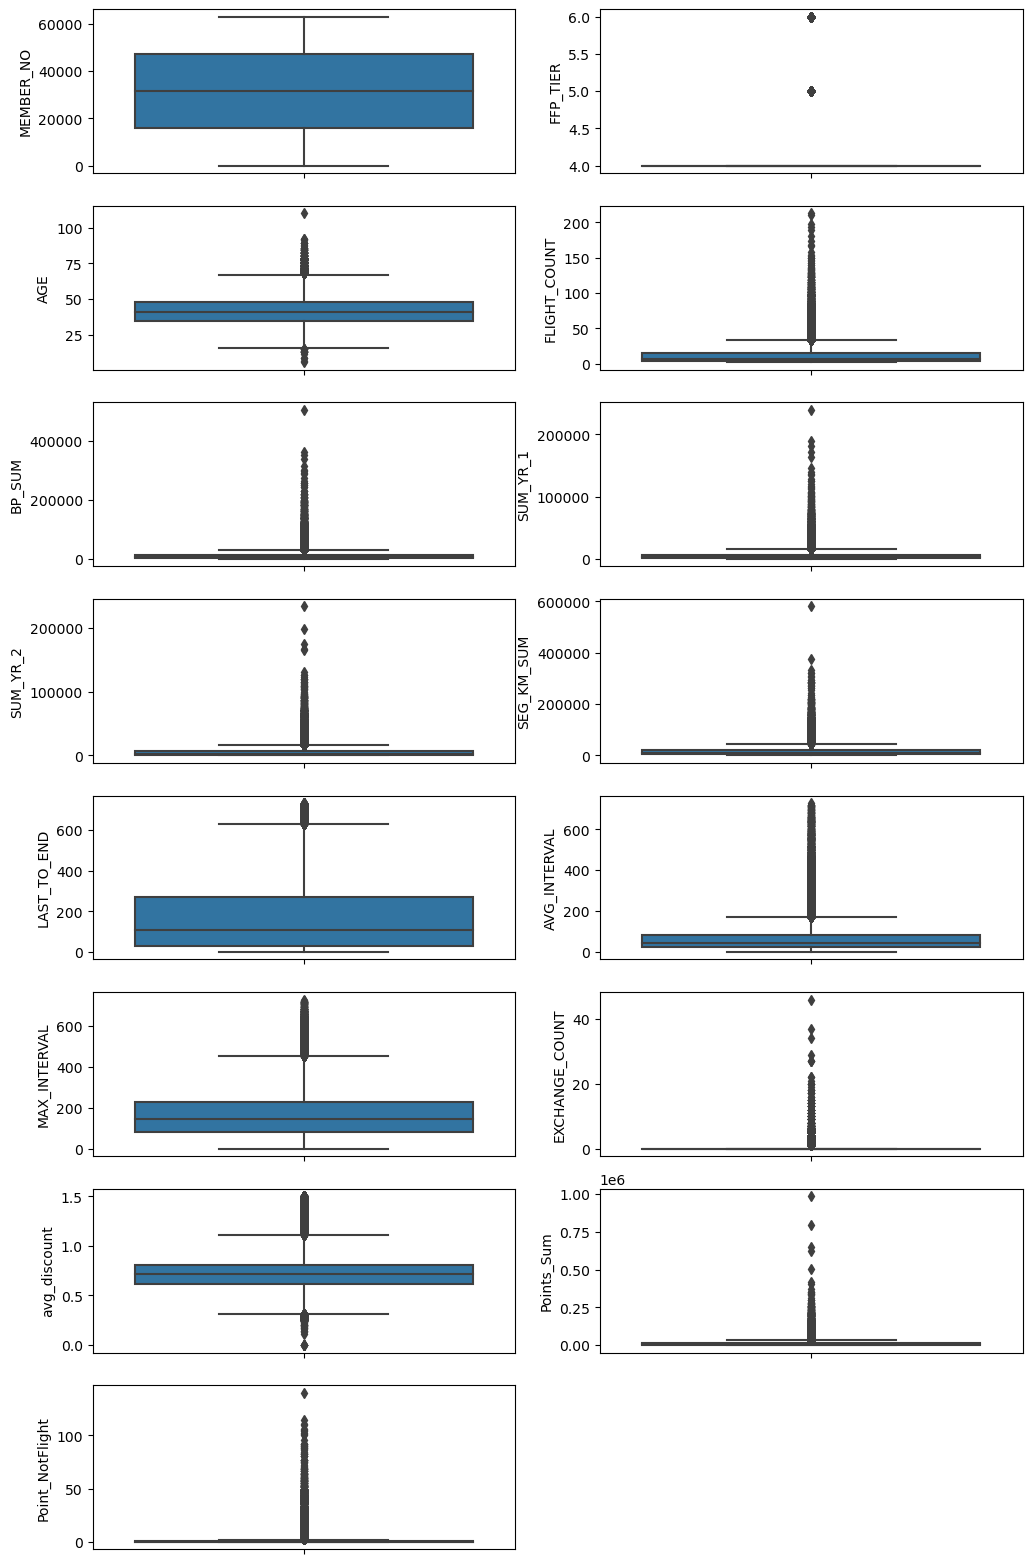

In [11]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.figure(figsize=(12, 20)) 
for i, col in enumerate(nums):
    plt.subplot(8, 2, i+1)
    sns.boxplot(y=df[col])
    plt.ylabel(col)
plt.show()

distribusi data outliers dapat dilihat bahwa ada Setiap kolom bertipe numerik yang melebihi range value yang ada. Hal ini akan di handling di preprocessing pada bagian handling outliers.

<Figure size 640x480 with 0 Axes>

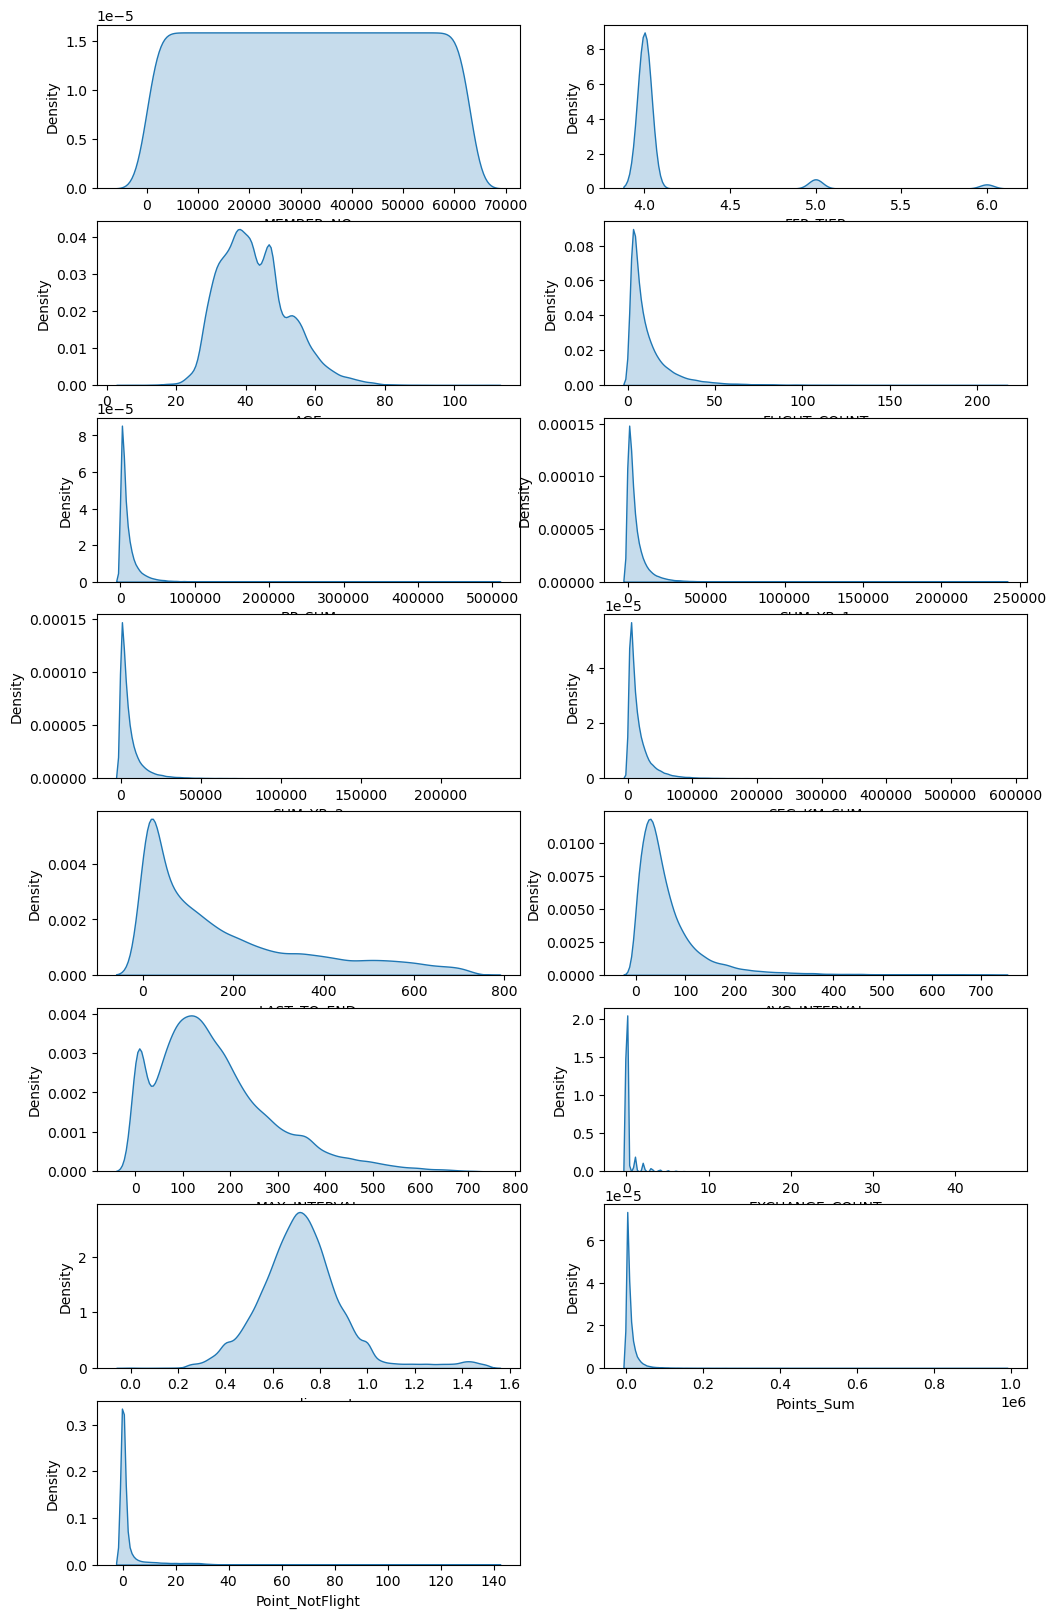

In [12]:
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()
plt.figure(figsize=(12, 20)) 
for i, col in enumerate(nums):
    plt.subplot(8, 2, i+1)
    sns.kdeplot(data=df[col], shade=True)
    plt.xlabel(col)
plt.show()

In [13]:
# Check tingkat kemiringan distribusi data numerik dengan skewness score
for i in range(0, len(nums)):
    print(f"Skewness {df[nums].columns[i]} : {df[nums[i]].skew()}")

Skewness MEMBER_NO : 1.320446898451163e-18
Skewness FFP_TIER : 3.873290798403592
Skewness AGE : 0.6259513251721389
Skewness FLIGHT_COUNT : 3.2153051579474066
Skewness BP_SUM : 5.660472851669501
Skewness SUM_YR_1 : 5.08803464862269
Skewness SUM_YR_2 : 4.601346426980965
Skewness SEG_KM_SUM : 3.884612209921392
Skewness LAST_TO_END : 1.1780712396622304
Skewness AVG_INTERVAL : 3.2073754731768838
Skewness MAX_INTERVAL : 1.073332581841645
Skewness EXCHANGE_COUNT : 8.199608074047509
Skewness avg_discount : 0.9567933070018152
Skewness Points_Sum : 8.38389682680554
Skewness Point_NotFlight : 4.270491906667679


- FFP_TIER: Distribusi data cenderung condong ke nilai yang lebih tinggi, mungkin menunjukkan mayoritas pelanggan memiliki tier tinggi.
- AGE: Skewness menunjukkan sedikit kecenderungan ke kanan, mungkin ada sejumlah kecil pelanggan yang lebih tua.
- FLIGHT_COUNT: Data sangat condong ke kanan, menunjukkan adanya sejumlah kecil pelanggan dengan jumlah penerbangan yang sangat tinggi.
- BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, EXCHANGE_COUNT, Points_Sum, Point_NotFlight: Semua memiliki skewness yang tinggi ke kanan, menunjukkan adanya sejumlah kecil pelanggan dengan nilai yang sangat tinggi pada variabel-variabel ini.
- LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, avg_discount: Memiliki skewness yang tidak terlalu tinggi, tetapi menunjukkan kecenderungan ke kanan, yang bisa mengindikasikan sejumlah kecil pelanggan dengan nilai yang lebih tinggi.

### Kategorikal

In [14]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


In [15]:
# Penjabaran tiap-tiap Unique Value fitur kategorikal
for col in cats:
    print(f'''Unique value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Unique value count kolom FFP_DATE:
--------------------------------------------------
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Unique value count kolom FIRST_FLIGHT_DATE:
--------------------------------------------------
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Unique value count kolom GENDER:
--------------------------------------------------
Male      48134
Female    14851
Name: GENDER, dtype: int64

Unique value count kolom WORK_CITY:
--------------------------------------------------
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI  

- unique values terbanyak adalah FIRST_FLIGHT_DATE dan yang paling sedikit adalah LOAD_TIME. 
- FFP_DATE & FIRST_FLIGHT_DATE: Menunjukkan tanggal pendaftaran pelanggan dan tanggal penerbangan pertama. Terdapat variasi besar dalam tanggal pendaftaran dan tanggal penerbangan pertama, menandakan variasi waktu bergabungnya pelanggan.  
- GENDER: Mayoritas pelanggan adalah pria (sekitar 76%), sedangkan wanita hanya sekitar 24%.  
- WORK_CITY & WORK_PROVINCE & WORK_COUNTRY: Data alamat tempat tinggal menunjukkan beragamnya lokasi tempat tinggal pelanggan, dengan mayoritas dari wilayah dan negara tertentu. Contohnya, sebagian besar pelanggan berasal dari Guangzhou (sekitar 15% dari data WORK_CITY).  
- LOAD_TIME & LAST_FLIGHT_DATE: Data pada kolom LOAD_TIME menunjukkan bahwa semua data diambil pada tanggal yang sama. Kolom LAST_FLIGHT_DATE menunjukkan tanggal terakhir pelanggan terbang, dengan mayoritas pelanggan terakhir terbang pada tanggal pengambilan data.

## Multivariate Analysis

In [16]:
print(df.corr())

                 MEMBER_NO  FFP_TIER       AGE  FLIGHT_COUNT    BP_SUM  \
MEMBER_NO         1.000000 -0.005910  0.001259     -0.000276  0.000063   
FFP_TIER         -0.005910  1.000000  0.078654      0.582447  0.581085   
AGE               0.001259  0.078654  1.000000      0.073246  0.100501   
FLIGHT_COUNT     -0.000276  0.582447  0.073246      1.000000  0.788379   
BP_SUM            0.000063  0.581085  0.100501      0.788379  1.000000   
SUM_YR_1         -0.002529  0.463122  0.111815      0.748032  0.850624   
SUM_YR_2          0.001185  0.611385  0.083743      0.794838  0.884632   
SEG_KM_SUM       -0.000032  0.522350  0.087254      0.850411  0.921724   
LAST_TO_END      -0.002588 -0.206313 -0.025600     -0.404999 -0.319039   
AVG_INTERVAL      0.002479 -0.144928 -0.024613     -0.316833 -0.246764   
MAX_INTERVAL      0.004761 -0.127641  0.009382     -0.188682 -0.147953   
EXCHANGE_COUNT   -0.003844  0.342355  0.029604      0.502501  0.530021   
avg_discount      0.001727  0.248845  

### Heatmap Correlation

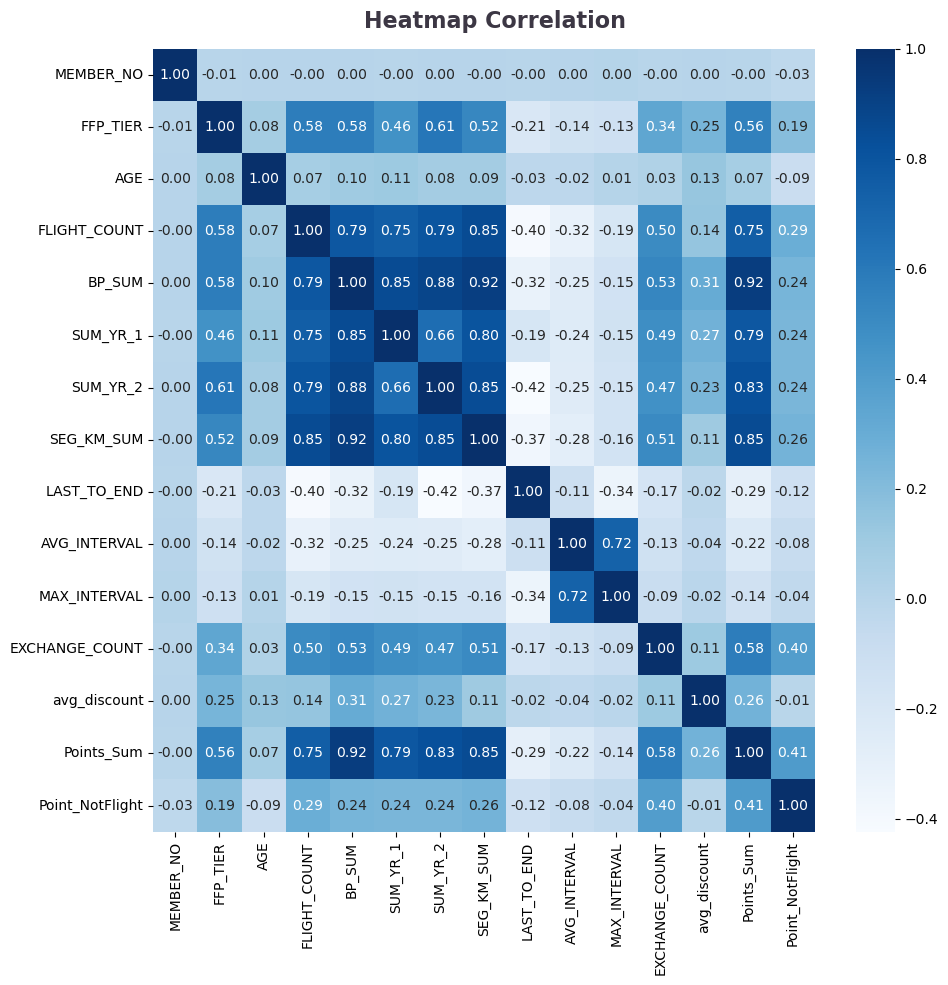

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues',fmt='.2f')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

- Hubungan positif yang kuat terlihat antara 'FLIGHT_COUNT' dan 'SEG_KM_SUM' dengan korelasi sekitar 0.85. Ini menunjukkan bahwa jumlah penerbangan yang dilakukan memiliki korelasi yang kuat dengan total jarak terbang yang ditempuh.  
- 'LAST_TO_END' memiliki korelasi negatif sedang dengan 'FLIGHT_COUNT' (-0.405), menunjukkan bahwa semakin lama waktu sejak penerbangan terakhir, jumlah penerbangan cenderung lebih rendah.  
- 'AGE' memiliki korelasi yang rendah dengan variabel lainnya dalam matriks, menunjukkan tidak adanya hubungan linier yang kuat dengan variabel lain.  
- variabel seperti 'BP_SUM' (Total poin yang dikumpulkan) memiliki korelasi yang tinggi dengan sejumlah variabel lainnya seperti 'FLIGHT_COUNT', 'SUM_YR_1', 'SUM_YR_2', dan 'SEG_KM_SUM', menunjukkan adanya hubungan yang erat antara total poin dengan aktivitas penerbangan dan jarak terbang.

## Data Preprocessing

Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering!  (20 poin) Langkah-langkah: a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut. b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

In [18]:
df_prep = df.copy()

### Handling Missing Values

In [19]:
# Fitur numerikal dengan Median dan Mean
df_prep['AGE'] = df_prep['AGE'].fillna(df_prep['AGE'].median())
df_prep['SUM_YR_1'] = df_prep['SUM_YR_1'].fillna(df_prep['SUM_YR_1'].median())
df_prep['SUM_YR_2'] = df_prep['SUM_YR_2'].fillna(df_prep['SUM_YR_2'].median())

In [20]:
df_prep = df_prep.drop(['MEMBER_NO','GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

### Handling irregular data types and Outliers

Menghapus record yang berhubungan dengan tanggal 2014/2/29 karena tidak ada tanggal 29 pada tahun itu karena kabisat

In [21]:
df_prep.drop(df_prep[df_prep.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [22]:
date_cols = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

for col in date_cols:
    df_prep[col] = pd.to_datetime(df_prep[col], errors='coerce')

In [23]:
from scipy import stats

# Define the list of features
features = ['AGE', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'avg_discount']

print(f'Total Baris sebelum melakukan Handling Outlier = {len(df_prep)}')

handling_outlier = np.array([True] * len(df_prep))

for col in features:
    zscore = abs(stats.zscore(df_prep[col]))
    handling_outlier = (zscore < 3) & handling_outlier
    
df_prep = df_prep[handling_outlier] 

print(f'Total Baris setelah melakukan Handling Outlier = {len(df_prep)}')

Total Baris sebelum melakukan Handling Outlier = 62567
Total Baris setelah melakukan Handling Outlier = 59010


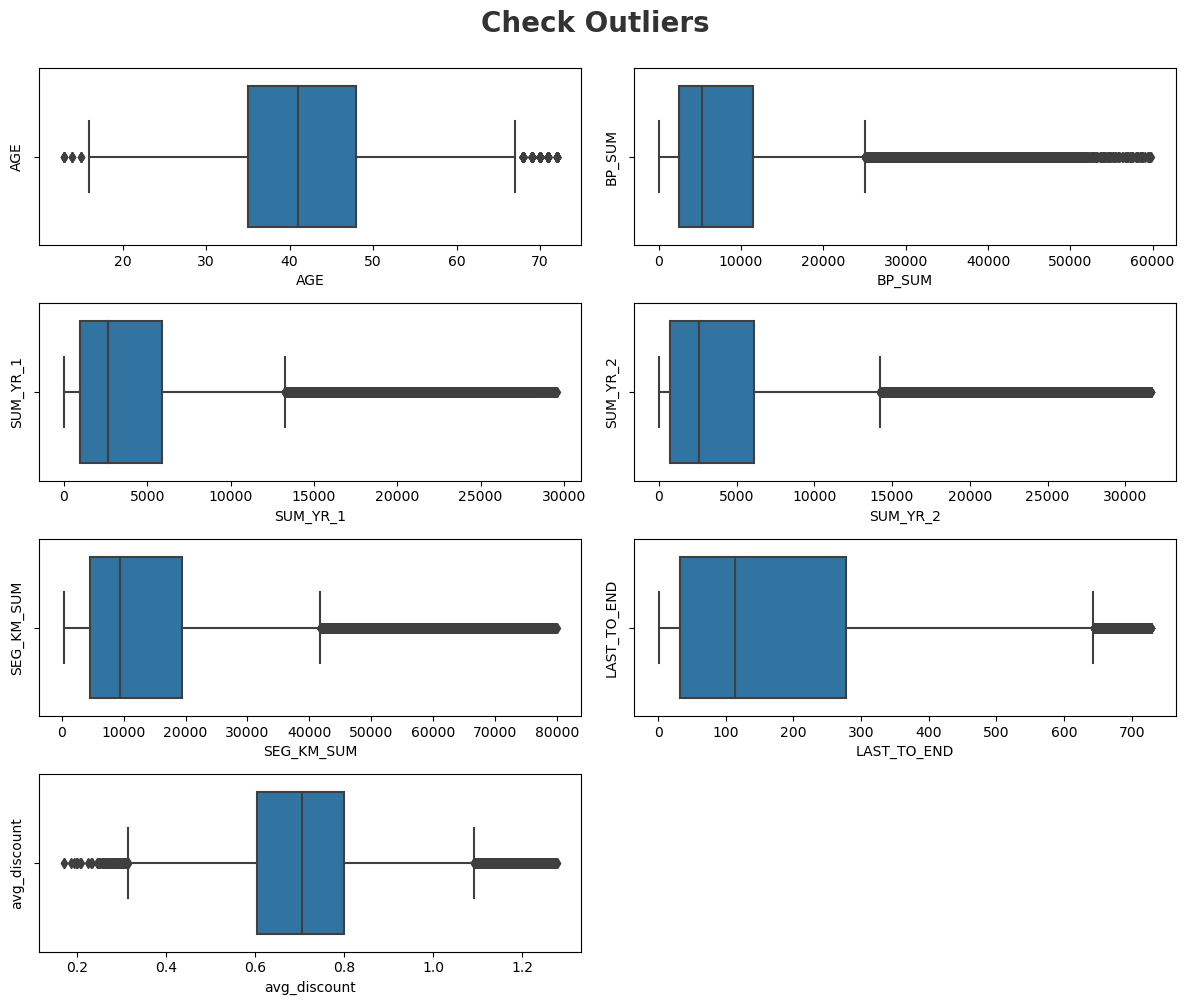

In [24]:
plt.figure(figsize=(12, 10))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i, col in enumerate(features):
    plt.subplot(4, 2, i+1)  
    sns.boxplot(x=df_prep[col])
    plt.ylabel(col)
plt.tight_layout()
plt.show()


## Feature Engineering

### Feature Selection

Salah satu metode segmentasi yang paling populer, mudah digunakan, dan efektif untuk memungkinkan pemasar menganalisis perilaku pelanggan adalah analisis RFM. Berdasarkan [artikel](https://books.google.co.id/books?id=CcH4DwAAQBAJ&pg=PA95&lpg=PA95&dq=chinese+member+airline+data+customer+bp_sum&source=bl&ots=MuNwvzNnN-&sig=ACfU3U0hPyubVpBG7RGuxmQgm9Zn7m2g6g&hl=en&sa=X&ved=2ahUKEwjZsKzHy7LsAhWZaCsKHW9XDW8Q6AEwCHoECAoQAg#v=onepage&q=chinese%20member%20airline%20data%20customer%20bp_sum&f=false) ini, mereka menyarankan untuk menggunakan model LRFMC yang memiliki tambahan parameter Length dan Discount Coefficient ketika melakukan segmentasi pelanggan pada data penerbangan. Jadi kita mendapatkan model LRFMC sebagai gantinya.

- **Length**: jumlah hari antara hari pertama pelanggan mendaftar hingga waktu pengamatan. Angka yang lebih besar berarti mereka telah menjadi anggota untuk waktu yang lebih lama (semakin besar semakin baik)
- **Recency**: lama waktu penerbangan terakhir penumpang ke jendela pengamatan. Angka yang lebih kecil berarti mereka terbang baru-baru ini (semakin kecil semakin baik)
- **Frequency**: frekuensi penerbangan penumpang dalam periode waktu tertentu. Angka yang lebih besar berarti mereka terbang lebih sering (semakin besar semakin baik)
- **Monetary** : jumlah rata-rata yang dihabiskan selama periode waktu tertentu. Angka yang lebih besar berarti mereka menghabiskan lebih banyak uang (lebih besar lebih baik)
- **Discount Coefficient**: faktor diskon tiket penerbangan rata-rata untuk penumpang yang bepergian dalam periode waktu tertentu Angka yang lebih besar berarti mereka lebih banyak menggunakan diskon (semakin kecil semakin baik)

Kolom-kolom yang terkait dengan parameter adalah sebagai berikut:

- **L**: LOAD_TIME - FFP_DATE
- **R**: LAST_TO_END
- **F**: FLIGHT_COUNT
- **M**: SEG_KM_FM
- **C**: avg_discount

In [25]:
# Mengonversi kolom tanggal ke format datetime
df_prep['FFP_DATE'] = pd.to_datetime(df_prep['FFP_DATE'])
df_prep['LOAD_TIME'] = pd.to_datetime(df_prep['LOAD_TIME'])
df_prep['LAST_FLIGHT_DATE'] = pd.to_datetime(df_prep['LAST_FLIGHT_DATE'])

In [26]:
df_new_feat = df_prep[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]

In [27]:
# Membuat Fitur loyalty / length berdasarkan fitur yang sudah ada takni LOAD TIME - FFP_DATE
df_new_feat['L'] = df_prep['LOAD_TIME'] - df_prep['FFP_DATE']
df_new_feat['L'] = (df_new_feat['L'].astype(str).str.split().str[0]).astype(int)
# Cek data
df_new_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59010 entries, 1028 to 62979
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LOAD_TIME     59010 non-null  datetime64[ns]
 1   FFP_DATE      59010 non-null  datetime64[ns]
 2   LAST_TO_END   59010 non-null  int64         
 3   FLIGHT_COUNT  59010 non-null  int64         
 4   SEG_KM_SUM    59010 non-null  int64         
 5   avg_discount  59010 non-null  float64       
 6   L             59010 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3)
memory usage: 3.4 MB


In [28]:
# Mengganti nama fitur dengan LRFMC
df_new_feat = df_new_feat[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
df_new_feat.columns = ['L','R','F','M','C']
df_new_feat.describe()

,L,R,F,M,C
count,59010.000000,59010.000000,59010.000000,59010.000000,59010.000000
mean,1463.944382,181.660837,10.334299,14505.428300,0.703851
std,838.772196,184.607233,10.442784,13980.686048,0.156692
min,365.000000,1.000000,2.000000,368.000000,0.171508
25%,723.000000,33.000000,3.000000,4619.000000,0.605770
50%,1245.000000,114.000000,7.000000,9485.000000,0.705297
75%,2151.000000,277.000000,13.000000,19492.500000,0.800000
max,3437.000000,729.000000,103.000000,79988.000000,1.277526


## Standarization

In [29]:
from sklearn.preprocessing import StandardScaler
X = df_new_feat
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std, columns = df_new_feat.columns)

In [30]:
df_std.describe()

,L,R,F,M,C
count,5.901000e+04,5.901000e+04,5.901000e+04,5.901000e+04,5.901000e+04
mean,1.194473e-16,-1.541255e-17,5.779707e-17,-1.001816e-16,-7.744807e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.310193e+00,-9.786310e-01,-7.980984e-01,-1.011220e+00,-3.397403e+00
25%,-8.833753e-01,-8.052886e-01,-7.023377e-01,-7.071550e-01,-6.259500e-01
50%,-2.610318e-01,-3.665155e-01,-3.192949e-01,-3.591005e-01,9.228644e-03
75%,8.191276e-01,5.164476e-01,2.552694e-01,3.567145e-01,6.136205e-01
max,2.352334e+00,2.964910e+00,8.873734e+00,4.683828e+00,3.661183e+00


In [31]:
df_std.head()

,L,R,F,M,C
0,-0.172807,-0.962380,3.511134,4.614160,1.166657
1,0.329121,-0.908211,2.936569,4.518384,1.066070
2,-1.082478,-0.935295,3.606894,4.574819,0.844875
3,-0.395754,-0.951546,0.255269,4.473107,0.894721
4,1.031344,-0.756536,5.809391,4.441849,0.883217


# Modeling

Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score  (30 poin) Langkah-langkah: a. Temukan jumlah cluster yang optimal dengan menggunakan elbow method b. Lakukan clustering menggunakan K-means c. Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA apabila diperlukan

## Clustering with K-Means

#### Elbow Plot

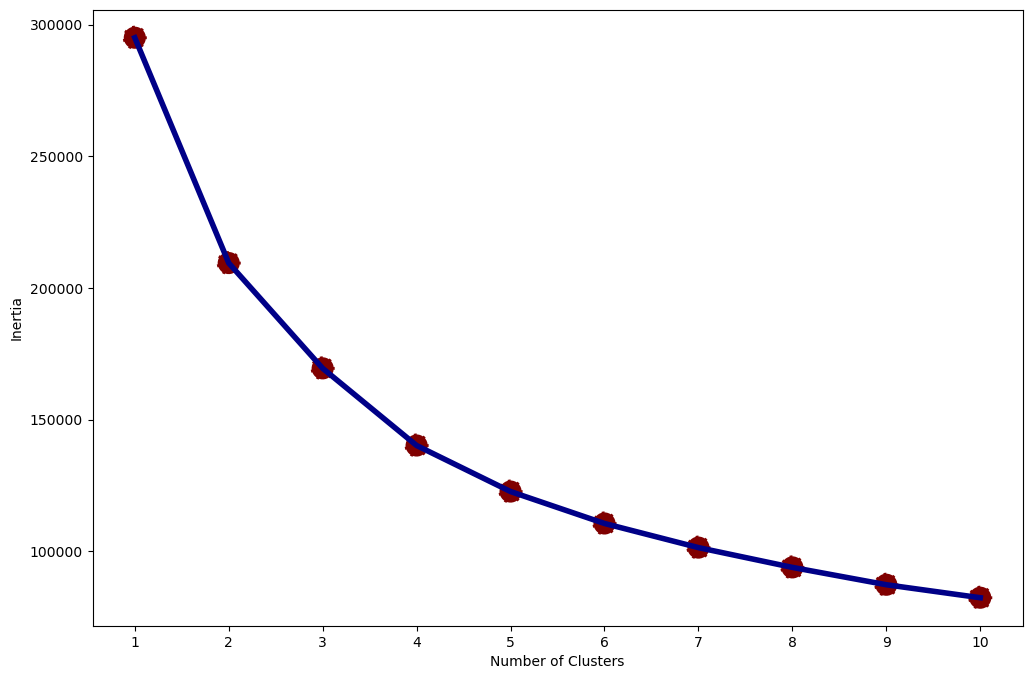

In [32]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

#### Yellowbrick Plot

Tujuan dari grafik ini adalah untuk menemukan titik di mana penurunan distortion mulai melambat (elbow point), yang mengindikasikan jumlah cluster optimal untuk data yang diberikan.

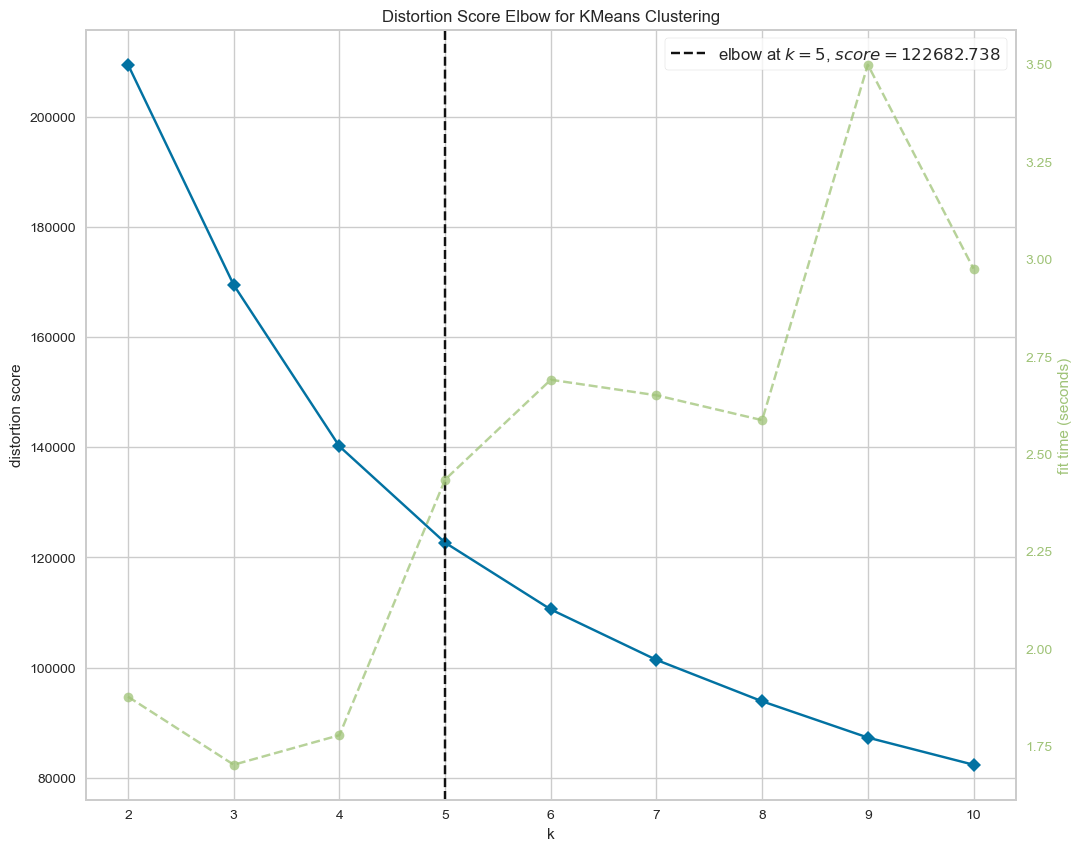

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(12, 10))

# fit model
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(df_std)       
visualizer.show()

 jumlah cluster optimal adalah 5

In [34]:
from sklearn.cluster import KMeans

# fitting model
kmeans = KMeans(n_clusters = 5, random_state = 0)
kc = kmeans.fit(df_std)
cluster_labels = kc.labels_

# Menambah kolom cluster
df_std = df_std.assign(Cluster = cluster_labels)
df_std.sample(10)

,L,R,F,M,C,Cluster
2815,-0.346872,-0.821539,1.883202,2.987330,-0.688755,3
16364,-0.932257,-0.464021,0.255269,0.122568,0.484198,2
39191,-0.255071,1.903187,-0.702338,-0.636199,0.100423,1
55087,-0.823764,-0.653614,-0.798098,-0.857220,-0.896335,0
7236,-0.913181,-0.426102,0.542552,0.661888,1.473127,2
39604,0.467420,-0.323180,-0.798098,-0.740415,1.570918,2
57286,-0.016625,0.083092,-0.798098,-0.881111,-1.474371,0
25267,1.146991,-0.469438,-0.415056,-0.121556,-0.501034,4
15177,0.285009,-0.214841,-0.223534,-0.164902,2.586883,2
8293,1.321056,-0.956963,1.787441,1.369799,-0.594610,3


### PCA

In [35]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['Cluster'] = df_std['Cluster']
df_pca.sample(5)

,PC 1,PC 2,Cluster
30472,-0.016372,-0.102577,2
37773,-0.256757,-0.538818,2
30412,-1.704650,-0.022427,1
42085,-2.407403,1.298322,0
11028,0.295146,1.064876,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

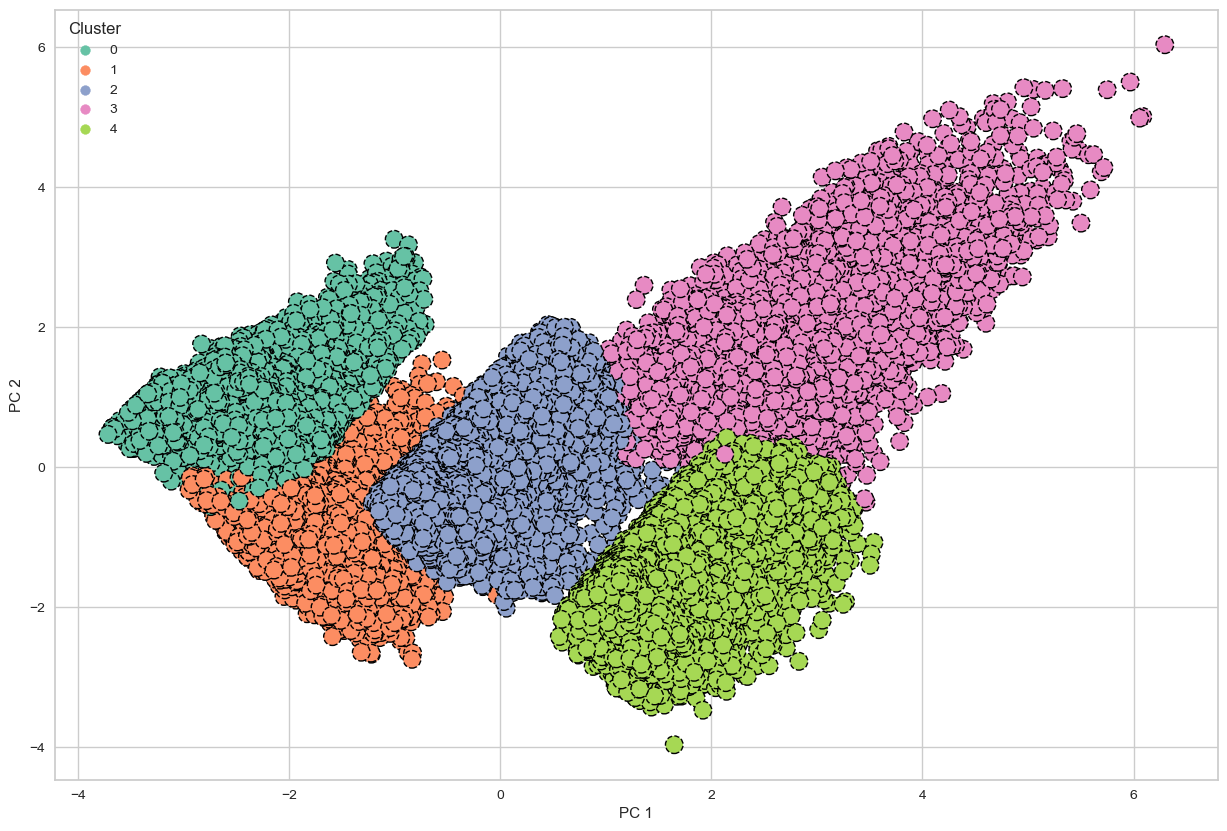

In [36]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Cluster",
    edgecolor='black',
    linestyle='--',
    data=df_pca,
    palette='Set2',
    s=160,
    ax=ax
)

Interpretasi cluster yang dihasilkan secara bisnis dan berikan rekomendasi yang sesuai dengan cluster yang dihasilkan  (30 poin) Langkah-langkah: a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing cluster c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi bisnis

#### Tempelkan label cluster ke dataframe asal dan keluarkan fitur statistik

In [37]:
df_new_feat['Cluster'] = kmeans.labels_
display(df_new_feat.groupby('Cluster').agg(['mean','median','min','max']))

L                               R                   \
                mean  median   min   max        mean median  min  max   
Cluster                                                                 
0        1025.391795   898.0   365  3352  187.995700  160.0    1  715   
1        1265.010942  1058.5   365  3429  505.830255  508.0  244  729   
2         916.513290   856.0   365  2227  100.952702   79.0    1  434   
3        1763.456268  1685.0   365  3437   41.557306   20.0    1  487   
4        2509.813078  2473.0  1589  3437  117.738279   92.0    1  561   

                 F                             M                        \
              mean median min  max          mean   median   min    max   
Cluster                                                                  
0         5.147796    4.0   2   27   7950.866804   6135.0   716  48928   
1         3.670950    3.0   2   32   5531.191628   4154.0   368  50290   
2         9.273486    8.0   2   34  12755.669271  11163.0   368  52310   
3        31.280574   29.0   4  103  42778.129594  40298.0  6992  79988   
4         8.713397    8.0   2   30  12332.285010  10659.5   368  55729   

                C                                
             mean    median       min       max  
Cluster                                          
0        0.510148  0.525000  0.171508  0.703120  
1        0.760969  0.751968  0.250000  1.276430  
2        0.775762  0.756667  0.529836  1.277526  
3        0.726329  0.718247  0.307729  1.272608  
4        0.719263  0.711695  0.288942  1.270576

### Persentase Customer

In [38]:
cnt_cluster = df_new_feat['Cluster'].value_counts().reset_index()
cnt_cluster.columns = ['Cluster', 'count']
cnt_cluster['Persen (%)'] = round((cnt_cluster['count']/len(df_std))*100,2)
cnt_cluster = cnt_cluster.sort_values(by=['Cluster']).reset_index(drop=True)
cnt_cluster

,Cluster,count,Persen (%)
0,0,11164,18.92
1,1,9962,16.88
2,2,16893,28.63
3,3,7809,13.23
4,4,13182,22.34


### Customer Segmentation

In [39]:
cl_median = df_std.groupby('Cluster').agg('median').reset_index()
cl_median

,Cluster,L,R,F,M,C
0,0,-0.674735,-0.117336,-0.606577,-0.598719,-1.141425
1,1,-0.483383,1.767764,-0.702338,-0.740415,0.307081
2,2,-0.724809,-0.556109,-0.223534,-0.239077,0.337068
3,3,0.263549,-0.875709,1.787441,1.844887,0.091873
4,4,1.203025,-0.485688,-0.223534,-0.275091,0.050061


- Cluster 1:  
L (Length): Sedang (-0.674735)  
R (Recency): Sedang (-0.117336)  
F (Frequency): Sedang (-0.606577)  
M (Monetary): Sedang (-0.598719)  
C (Discount Coefficient): Rendah (-1.141425)  

- Cluster 2:  
L (Length): Sedang (-0.483383)  
R (Recency): Tinggi (1.767764)  
F (Frequency): Rendah (-0.702338)  
M (Monetary): Rendah (-0.740415)  
C (Discount Coefficient): Sedang (0.307081)  

- Cluster 3:  
L (Length): Sedang (-0.724809)  
R (Recency): Sedang (-0.556109)  
F (Frequency): Sedang (-0.223534)  
M (Monetary): Sedang (-0.239077)  
C (Discount Coefficient): Sedang (0.337068)  

- Cluster 4:  
L (Length): Tinggi (0.263549)  
R (Recency): Sedang (-0.875709)  
F (Frequency): Tinggi (1.787441)  
M (Monetary): Tinggi (1.844887)  
C (Discount Coefficient): Sedang (0.091873)  

- Cluster 5:  
L (Length): Tinggi (1.203025)  
R (Recency): Sedang (-0.485688)  
F (Frequency): Sedang (-0.223534)  
M (Monetary): Sedang (-0.275091)  
C (Discount Coefficient): Sedang (0.050061)  

### Analisis Segmentasi LFRMC pada tiap Clusternya

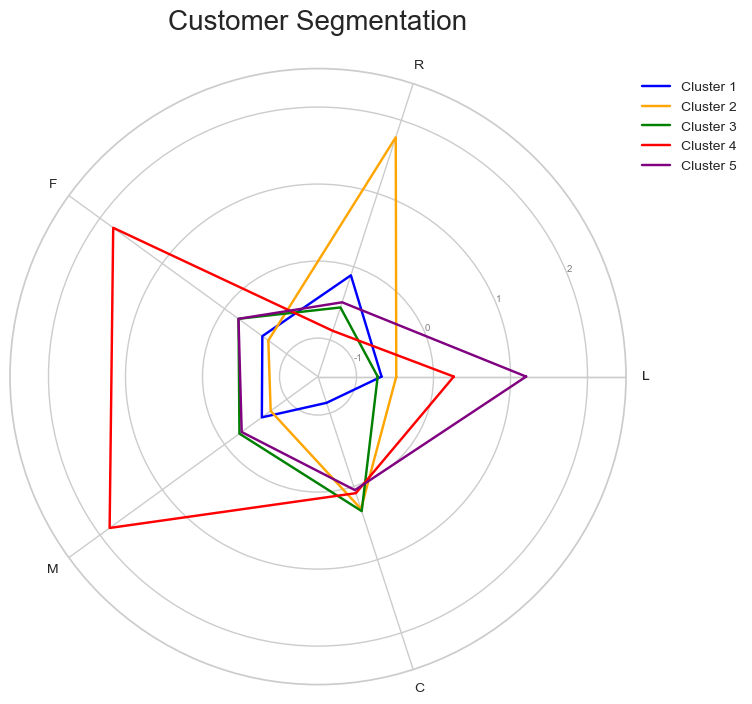

In [40]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

for i in range(0, 5):
    num = []
    for cat in category:
        num.append(cl_median[cat][i])
    num.append(cl_median['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(0, 5):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1, 0, 1, 2], ["-1", "0", "1", "2"], color="grey", size=7)
plt.ylim(-1.5, 2.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


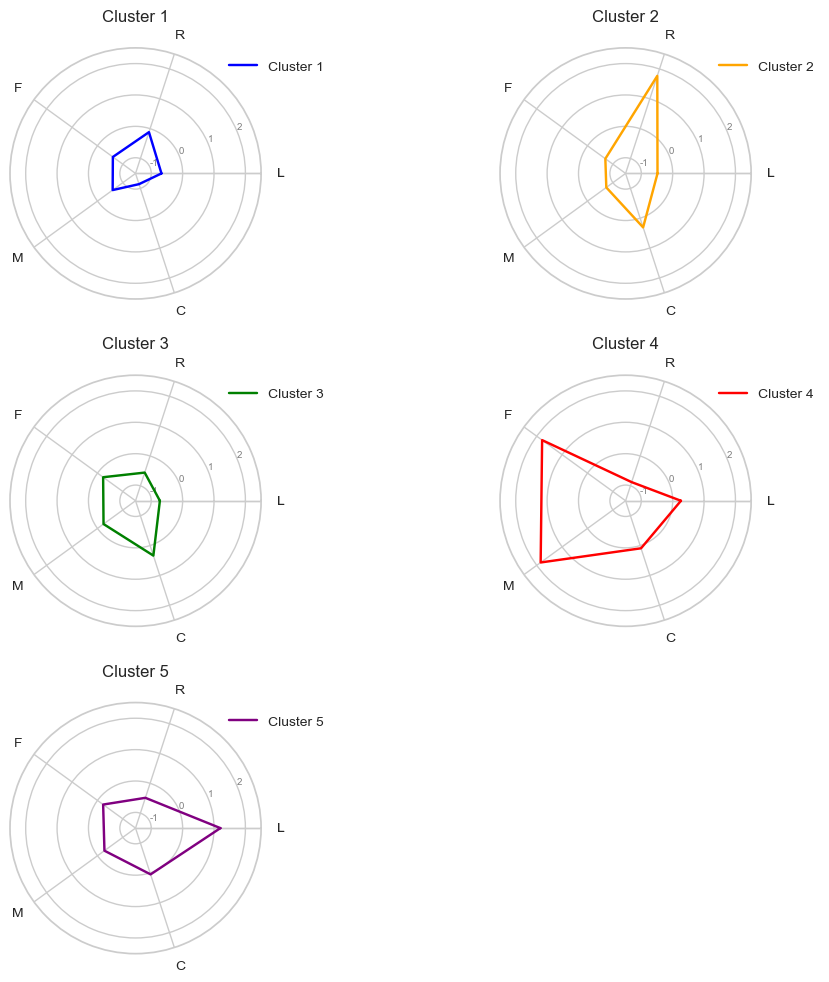

In [41]:
plt.figure(figsize=(10, 10))

for i in range(5):
    plt.subplot(3, 2, i+1, polar=True)
    plt.title(f'Cluster {i+1}')
    plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.yticks([-1, 0, 1, 2], ["-1", "0", "1", "2"], color="grey", size=7)
    plt.ylim(-1.5, 2.5)
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')  # Mengubah dari i+0 ke i+1
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

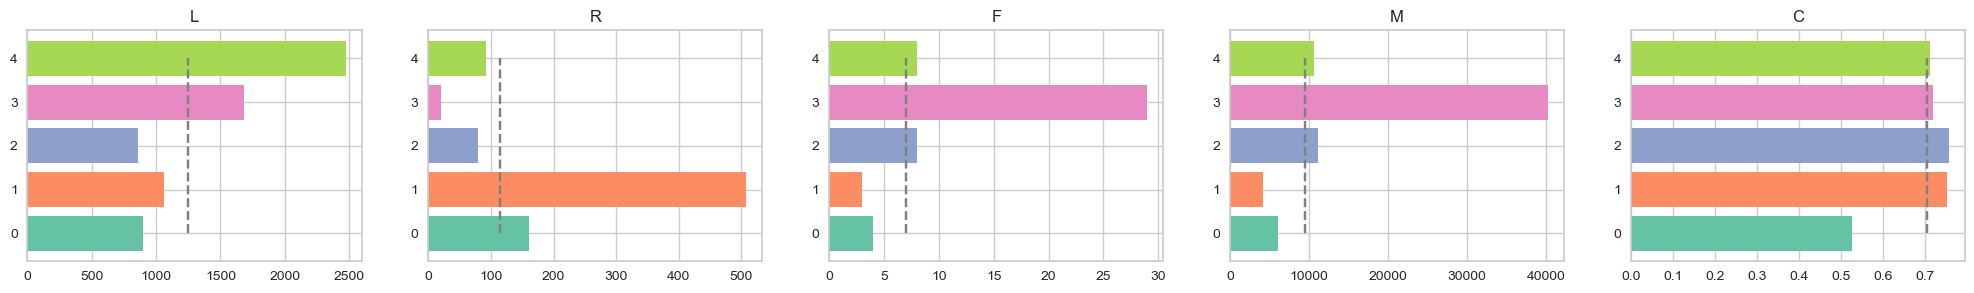

In [48]:
LRFMC= ['L', 'R', 'F', 'M', 'C']
c = sns.color_palette("Set2")
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(df_new_feat[col].median(), ymin=0, ymax=4, color='grey', linestyle='--')
        g = df_new_feat.groupby('Cluster')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c) 
        plt.title(col)
        i = i+1
        
dist_list(LRFMC)

| Cluster | Length (L) | Recency (R) | Frequency (F) | Monetary (M) | Discount Coefficient (C) |
|---------|------------|-------------|----------------|--------------|--------------------------|
| 1       | Sedang     | Sedang      | Rendah         | Rendah       | Rendah                   |
| 2       | Sedang     | Tinggi      | Rendah         | Rendah       | Sedang                   |
| 3       | Sedang     | Sedang      | Sedang         | Sedang       | Sedang                   |
| 4       | Tinggi     | Rendah      | Tinggi         | Tinggi       | Sedang                   |
| 5       | Tinggi     | Sedang      | Rendah         | Sedang       | Sedang                   |


Cluster 1: Menunjukkan anggota yang memiliki nilai "sedang" untuk sebagian besar faktor, termasuk durasi keanggotaan (Length), frekuensi penerbangan (Frequency), pengeluaran rata-rata (Monetary), dan penggunaan diskon (Discount Coefficient). Namun, mereka cenderung memiliki nilai rendah untuk frekuensi penggunaan layanan baru-baru ini (Recency).

Cluster 2: Memiliki kecenderungan nilai "tinggi" untuk durasi keanggotaan (Length) dan penggunaan layanan baru-baru ini (Recency), namun memiliki frekuensi penerbangan (Frequency) dan pengeluaran rata-rata (Monetary) yang rendah. Penggunaan diskon (Discount Coefficient) mereka cenderung berada di kategori "sedang".

Cluster 3: Anggota klaster ini memiliki sebagian besar nilai "sedang" untuk setiap faktor, termasuk durasi keanggotaan (Length), penggunaan layanan baru-baru ini (Recency), frekuensi penerbangan (Frequency), pengeluaran rata-rata (Monetary), dan penggunaan diskon (Discount Coefficient).

Cluster 4: Menampilkan nilai "tinggi" untuk frekuensi penerbangan (Frequency) dan pengeluaran rata-rata (Monetary), tetapi memiliki nilai "rendah" untuk penggunaan layanan baru-baru ini (Recency). Durasi keanggotaan (Length) dan penggunaan diskon (Discount Coefficient) mereka cenderung berada di kategori "sedang".

Cluster 5: Klaster ini menunjukkan anggota yang memiliki durasi keanggotaan (Length) dan penggunaan layanan baru-baru ini (Recency) dengan nilai "tinggi". Namun, mereka cenderung memiliki frekuensi penerbangan (Frequency), pengeluaran rata-rata (Monetary), dan penggunaan diskon (Discount Coefficient) yang berada di kategori "sedang".

### Visualisasi Persentase Customer tiap Clusters

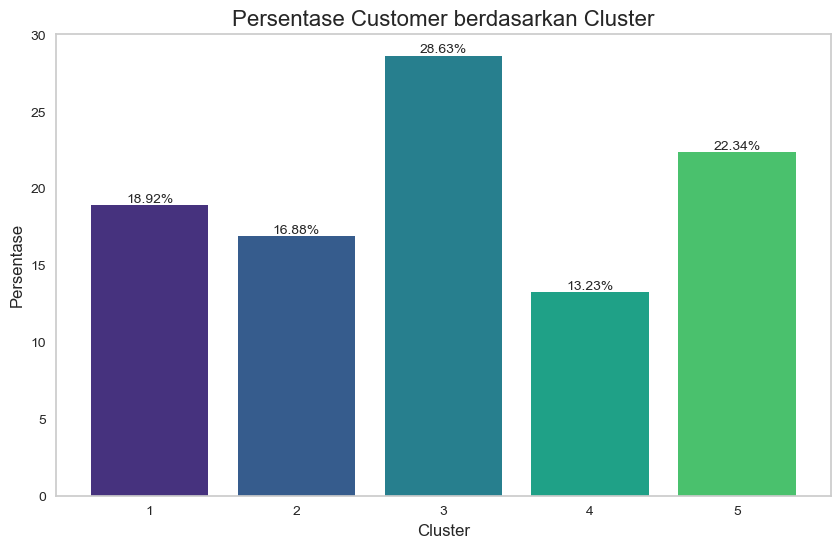

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

c = sns.color_palette("viridis")
bars = plt.bar(x=cnt_cluster['Cluster'] + 1, height=cnt_cluster['Persen (%)'], color=c)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

ax.grid(False)
plt.title('Persentase Customer berdasarkan Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Persentase', fontsize=12)
plt.show()

# Deskripsi Clusters dan Rekomendasi bisnis

- **Cluster 1**: ***Occasional Loyalists***  
**Deskripsi Customer**: Klaster ini mewakili pelanggan yang telah menjadi anggota dengan durasi "sedang" namun cenderung menggunakan layanan maskapai "tidak terlalu baru-baru ini". Mereka memiliki kecenderungan pengeluaran dan penggunaan diskon dalam kategori "rendah", serta frekuensi penerbangan yang juga rendah.  
**Rekomendasi Bisnis**: Perhatikan tren penurunan aktivitas baru-baru ini dan tawarkan insentif spesial atau diskon untuk mendorong kembali keaktifan pelanggan. Kembangkan program promosi atau penghargaan yang lebih menarik berdasarkan aktivitas mereka untuk meningkatkan frekuensi penggunaan.   

- **Cluster 2**: ***Recent Elite Fliers***  
**Deskripsi Customer**: Pelanggan di klaster ini memiliki durasi keanggotaan yang "tinggi" dan baru-baru ini sering menggunakan layanan maskapai. Namun, mereka cenderung memiliki frekuensi penerbangan dan pengeluaran yang "rendah". Penggunaan diskon mereka cenderung berada di kategori "sedang".  
**Rekomendasi Bisnis**: Tingkatkan promosi produk atau layanan yang bisa menarik mereka untuk meningkatkan pengeluaran rata-rata. Berikan insentif khusus atau diskon yang lebih menarik untuk mendorong peningkatan frekuensi penerbangan.  

- **Cluster 3**: ***Steady Balanced Users***  
**Deskripsi Customer**: Klaster ini mewakili pelanggan dengan nilai "sedang" untuk semua faktor, menunjukkan keseimbangan dalam penggunaan layanan, frekuensi penerbangan, pengeluaran, serta penggunaan diskon.  
**Rekomendasi Bisnis**: Perhatikan tren penggunaan layanan atau diskon yang cenderung stabil dan tingkatkan interaksi melalui program loyalitas yang menarik.  

- **Cluster 4**: ***Spending Enthusiasts***  
**Deskripsi Customer**: Pelanggan di sini memiliki nilai "tinggi" untuk frekuensi penggunaan layanan dan pengeluaran, namun menggunakan layanan "tidak terlalu baru-baru ini". Penggunaan diskon mereka berada di kategori "sedang".  
**Rekomendasi Bisnis**: Tawarkan insentif atau promosi untuk meningkatkan aktivitas baru-baru ini dan mempertahankan pengeluaran tinggi mereka. Kembangkan program yang lebih menarik untuk membangun keterlibatan mereka yang telah aktif namun terjadi penurunan aktivitas.  

- **Cluster 5**: ***Long-Term Active Members***
**Deskripsi Customer**: Klaster ini menunjukkan pelanggan yang telah menjadi anggota dalam jangka waktu yang "tinggi" dan baru-baru ini juga aktif menggunakan layanan. Meskipun demikian, frekuensi penerbangan, pengeluaran, dan penggunaan diskon mereka cenderung berada di kategori "sedang".  
**Rekomendasi Bisnis**: Berikan insentif khusus atau keanggotaan yang lebih eksklusif untuk mempertahankan keterlibatan pelanggan jangka panjang dan mendorong peningkatan aktivitas penggunaan layanan.  